# World Universities Ranking - A Case Study
*Analyzing responses from the survey of world universites*
![](https://xp.io/storage/D19Ukr9.png)


In this project, we will be analysing a dataset that belong to a survey of worlds universities. In the data set on the basis of lot of parameters rank of universities is decided  
The main objective of this project is to use the dataset to extract some informations about the universities.

## Downloading the Dataset

We are downloading data from kaggle website


In [ ]:
pip install opendatasets --upgrade --quiet

In [1]:
import opendatasets as od

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url1 = 'https://www.kaggle.com/mylesoneill/world-university-rankings'

In [4]:
od.download(dataset_url1)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: shivanshchoudhary
Your Kaggle Key: ········


100%|██████████| 1.41M/1.41M [00:00<00:00, 45.7MB/s]

In [5]:
# Change this
data_dir = './world-university-rankings'

In [6]:
import os
os.listdir(data_dir)

['school_and_country_table.csv',
 'education_expenditure_supplementary_data.csv',
 'cwurData.csv',
 'educational_attainment_supplementary_data.csv',
 'timesData.csv',
 'shanghaiData.csv']

Let us save and upload our work to Jovian before continuing.

In [7]:
project_name = "world-universities-ranking" 

## Data Preparation and Cleaning

Let's prepare our data for analysis



So first import some python libraries to read and process our data

In [8]:
import pandas as pd
import numpy as np

Let's read our csv file which contain lots of data to analyze using pandas `read_csv` method

In [9]:
survey_raw_df=pd.read_csv(data_dir+'/'+'cwurData.csv',index_col=False)
survey_raw_df.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


let's figure out what are the columns in our dataframe

In [10]:
survey_columns=survey_raw_df.columns
survey_columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')

In [11]:
survey_shape=survey_raw_df.shape
survey_shape

(2200, 14)

In [12]:
print("Its mean is that there are {} columns and {} rows".format(survey_shape[1],survey_shape[0]))

Its mean is that there are 14 columns and 2200 rows


In [13]:
survey_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


In [14]:
survey_raw_df.isna().sum()

world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

The code of above two cells is showing that except `broad_impact` column there is no column which has `null values`

In [15]:
survey_raw_df.describe()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2000.000000,2200.000000,2200.000000,2200.000000
mean,459.590909,40.278182,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,496.699500,433.346364,47.798395,2014.318182
std,304.320363,51.740870,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,286.919755,273.996525,7.760806,0.762130
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.360000,2012.000000
25%,175.750000,6.000000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,250.500000,170.750000,44.460000,2014.000000
50%,450.500000,21.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,496.000000,426.000000,45.100000,2014.000000
75%,725.250000,49.000000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,741.000000,714.250000,47.545000,2015.000000
max,1000.000000,229.000000,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,1000.000000,871.000000,100.000000,2015.000000


In [16]:
survey_raw_df.nunique()

world_rank              1000
institution             1024
country                   59
national_rank            229
quality_of_education     367
alumni_employment        565
quality_of_faculty       199
publications             987
influence                944
citations                135
broad_impact             343
patents                  738
score                    764
year                       4
dtype: int64

In [17]:
survey_raw_df.year.unique()

array([2012, 2013, 2014, 2015])

It is showing that this `survey_raw_df` include survey of four different years let's separate it by there year 

In [18]:
survey_2012_df=survey_raw_df[survey_raw_df.year==2012]
survey_2013_df=survey_raw_df[survey_raw_df.year==2013]
survey_2014_df=survey_raw_df[survey_raw_df.year==2014]
survey_2015_df=survey_raw_df[survey_raw_df.year==2015]

In [19]:
survey_2012_df.shape

(100, 14)

In [20]:
survey_2013_df.shape

(100, 14)

In [21]:
survey_2014_df.shape

(1000, 14)

In [22]:
survey_2015_df.shape

(1000, 14)

Since in only two surveys of year 2014 and 2015 we have sufficient amount of data to visulize so we are going to go throw `survey_2015_df`

In [23]:
# Now lets figure out nunique values
survey_2015_df.nunique()

world_rank              1000
institution             1000
country                   59
national_rank            229
quality_of_education     367
alumni_employment        564
quality_of_faculty       176
publications             924
influence                915
citations                 61
broad_impact             211
patents                  736
score                    416
year                       1
dtype: int64

Now there is no duplicate of world ranking

In [24]:
survey_2015_df.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
1200,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,3,100.00,2015
1201,2,Stanford University,USA,2,9,2,4,5,3,3,4.0,10,98.66,2015
1202,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,2.0,1,97.54,2015
1203,4,University of Cambridge,United Kingdom,1,2,10,5,11,6,12,13.0,48,96.81,2015
1204,5,University of Oxford,United Kingdom,2,7,13,10,7,12,7,9.0,15,96.46,2015


## Exploratory Analysis and Visualization

Let's explore ourdata set and do something interesting

So first begin by importing`matplotlib.pyplot` and `seaborn`.

In [25]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [26]:
survey_df=survey_2015_df.copy()
# Lets change name of our dataframe
survey_df.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
1200,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,3,100.00,2015
1201,2,Stanford University,USA,2,9,2,4,5,3,3,4.0,10,98.66,2015
1202,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,2.0,1,97.54,2015
1203,4,University of Cambridge,United Kingdom,1,2,10,5,11,6,12,13.0,48,96.81,2015
1204,5,University of Oxford,United Kingdom,2,7,13,10,7,12,7,9.0,15,96.46,2015


In [27]:
# # let's drop index column,there is no need of it
survey_df.reset_index(drop=True,inplace=True)

survey_df.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,3,100.00,2015
1,2,Stanford University,USA,2,9,2,4,5,3,3,4.0,10,98.66,2015
2,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,2.0,1,97.54,2015
3,4,University of Cambridge,United Kingdom,1,2,10,5,11,6,12,13.0,48,96.81,2015
4,5,University of Oxford,United Kingdom,2,7,13,10,7,12,7,9.0,15,96.46,2015


### Country

Let's look at the number of countries from which there are universities in the survey and plot the ten countries with the highest number of universities in the survey

In [28]:
survey_df.country.nunique()

59

Its mean there are 59 countries which participated in this survey

In [29]:
top_countries=survey_df.country.value_counts().head(10)
top_countries

USA               229
China              83
Japan              74
United Kingdom     65
Germany            55
France             49
Italy              47
Spain              40
South Korea        36
Canada             33
Name: country, dtype: int64

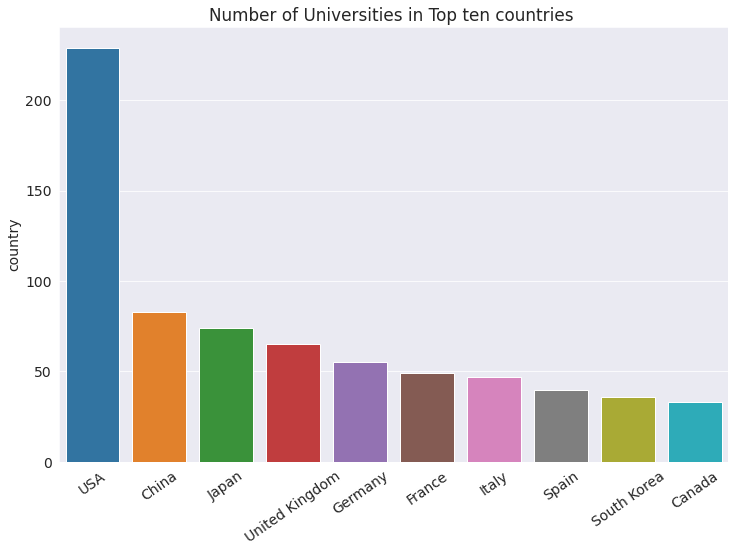

In [30]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=35)
plt.title('Number of Universities in Top ten countries ')
sns.barplot(x=top_countries.index,y=top_countries);

It appears that  highest number of universities are from the `USA` number is `229` amongs `1000` universities from all across 59 countries of the world. On number `2` there is `China` with 83 and then `Japan` on number `3` with 74. Disappointmentily India is not in top 10

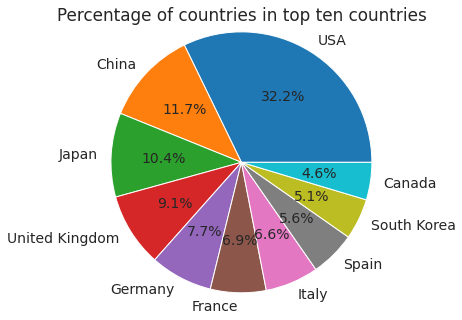

In [31]:
# Now we can see it using pie chart also
top_countries=survey_df.country.value_counts().head(10)
top_countries.values/top_countries.sum()*100
plt.title('Percentage of countries in top ten countries')
plt.pie(top_countries,labels=top_countries.index,radius=1.2,autopct='%1.1f%%');

### Score 
we are going visulize and analyze score of the countries using graph

lets found min and max score

In [32]:
min_score=survey_df.score.min()
max_score=survey_df.score.max()
ave_score=survey_df.score.mean()
print('minimum score is {}, maximum score is {} and average is {} of universities'.format(min_score,max_score,ave_score))

minimum score is 44.02, maximum score is 100.0 and average is 46.863850000000006 of universities


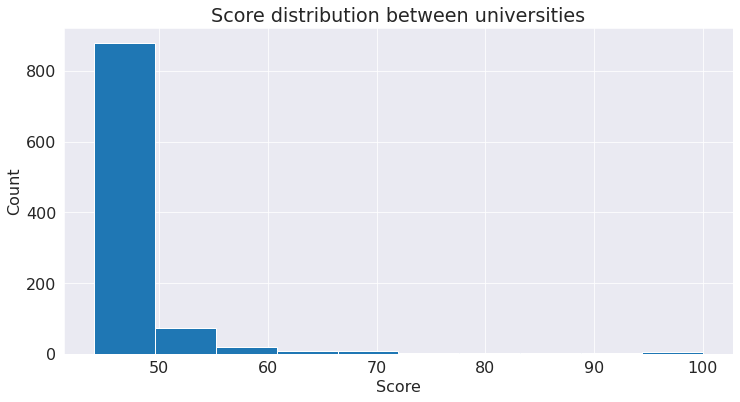

In [33]:
%matplotlib inline
plt.figure(figsize=(12, 6))
matplotlib.rcParams['font.size']=16
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Score distribution between universities')
plt.hist(survey_df.score);


Score distribution graph is showing that most of countries score lie between 44 to 50, only few universities have score above 70, number of such universities is too small let's count it

In [34]:
score_70=survey_df[survey_df.score>=70]
score_70

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,3,100.00,2015
1,2,Stanford University,USA,2,9,2,4,5,3,3,4.0,10,98.66,2015
2,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,2.0,1,97.54,2015
3,4,University of Cambridge,United Kingdom,1,2,10,5,11,6,12,13.0,48,96.81,2015
4,5,University of Oxford,United Kingdom,2,7,13,10,7,12,7,9.0,15,96.46,2015
5,6,Columbia University,USA,4,13,6,9,13,13,11,12.0,4,96.14,2015
6,7,"University of California, Berkeley",USA,5,5,21,6,10,4,4,7.0,29,92.25,2015
7,8,University of Chicago,USA,6,11,14,8,17,16,12,22.0,141,90.70,2015
8,9,Princeton University,USA,7,4,15,3,72,25,24,33.0,225,89.42,2015
9,10,Cornell University,USA,8,12,18,14,24,15,25,22.0,11,86.79,2015


Only Top 16 universities have score greater than  equal to 70

### Indian Universities
let's analysize and visulize what is indian universities situation in this survey

In [35]:
survey_india_df=survey_df[survey_df.country=='India']
survey_india_df

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
340,341,Indian Institute of Technology Delhi,India,1,367,59,218,635,943,812,781.0,625,45.54,2015
378,379,University of Delhi,India,2,240,72,218,703,763,812,796.0,797,45.30,2015
447,448,Indian Institute of Science,India,3,367,332,218,315,537,511,447.0,239,44.96,2015
490,491,Panjab University,India,4,333,167,218,720,786,368,540.0,824,44.80,2015
533,534,Indian Institute of Technology Madras,India,5,367,147,218,523,943,812,796.0,317,44.68,2015
595,596,Indian Institute of Technology Bombay,India,6,367,507,218,521,815,645,699.0,176,44.52,2015
600,601,Tata Institute of Fundamental Research,India,7,367,567,218,468,450,368,540.0,792,44.51,2015
613,614,Indian Institute of Technology Kharagpur,India,8,367,242,218,500,974,812,686.0,644,44.49,2015
637,638,Indian Institute of Technology Roorkee,India,9,367,395,218,839,931,428,565.0,871,44.44,2015
678,679,Banaras Hindu University,India,10,243,260,218,754,904,511,741.0,871,44.39,2015


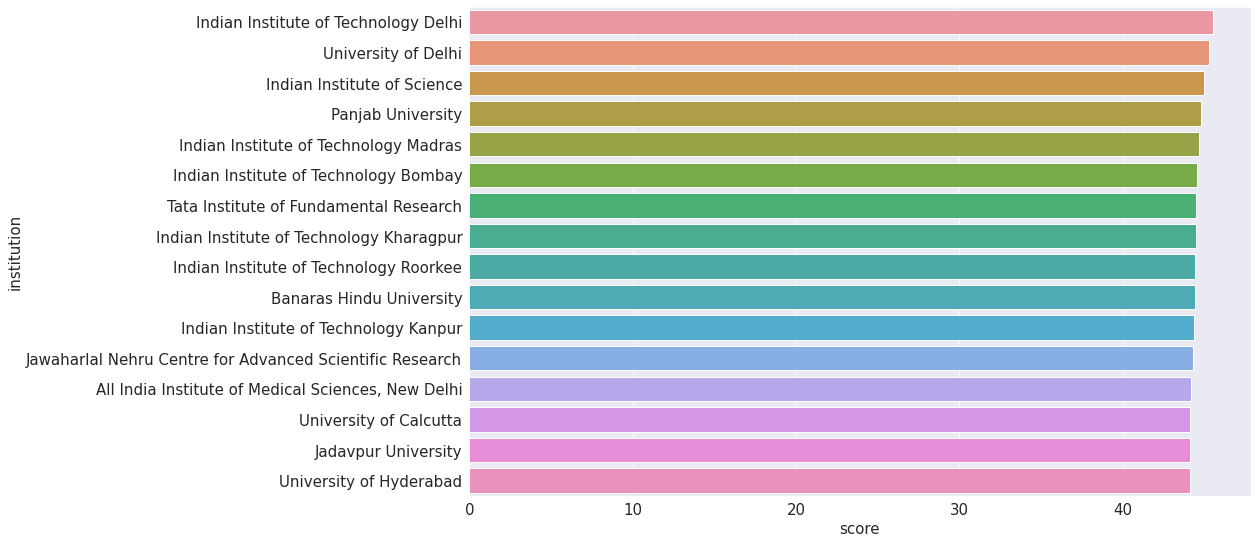

In [36]:
%matplotlib inline
matplotlib.rcParams['font.size']=15
matplotlib.rcParams['figure.figsize']=(14,9)
sns.barplot(y=survey_india_df.institution,x=survey_india_df.score);

So graph is indicating that Indian Universities score is between  40 and 50. So Indian need to improove their universities 

### Patent
let's visulize top ten universities ranking on bases of patents

In [37]:
on_the_base_of_patents=survey_df.sort_values('patents')
on_the_base_of_patents=on_the_base_of_patents[['world_rank','institution','country','patents','score']].copy().head(10)

on_the_base_of_patents

,world_rank,institution,country,patents,score
2,3,Massachusetts Institute of Technology,USA,1,97.54
15,16,Johns Hopkins University,USA,2,71.60
0,1,Harvard University,USA,3,100.00
5,6,Columbia University,USA,4,96.14
59,60,University of Florida,USA,5,54.18
23,24,Seoul National University,South Korea,6,64.82
12,13,University of Tokyo,Japan,7,78.23
143,144,Korea Advanced Institute of Science and Techno...,South Korea,8,48.95
14,15,"University of California, Los Angeles",USA,9,76.91
1,2,Stanford University,USA,10,98.66


So on the bases of patents `MIT` is number in the world. Overall rank 1 `Harvard University` rank is 3. We can see that some universities overall rank is not too good but on the basis of patents they are int top 10

### Alumini employment
Analyzing universities according to their performance in alumini employment which is also a big factor

In [38]:
base_of_alumini_employment=survey_df.sort_values('alumni_employment')[['world_rank','institution','country','alumni_employment','score']].copy().head(10)
base_of_alumini_employment

,world_rank,institution,country,alumni_employment,score
0,1,Harvard University,USA,1,100.00
1,2,Stanford University,USA,2,98.66
12,13,University of Tokyo,Japan,3,78.23
13,14,University of Pennsylvania,USA,4,77.60
33,34,Keio University,Japan,5,59.84
5,6,Columbia University,USA,6,96.14
35,36,École Polytechnique,France,7,59.20
37,38,Waseda University,Japan,8,58.17
23,24,Seoul National University,South Korea,9,64.82
3,4,University of Cambridge,United Kingdom,10,96.81


#### Complete visulization in one chart

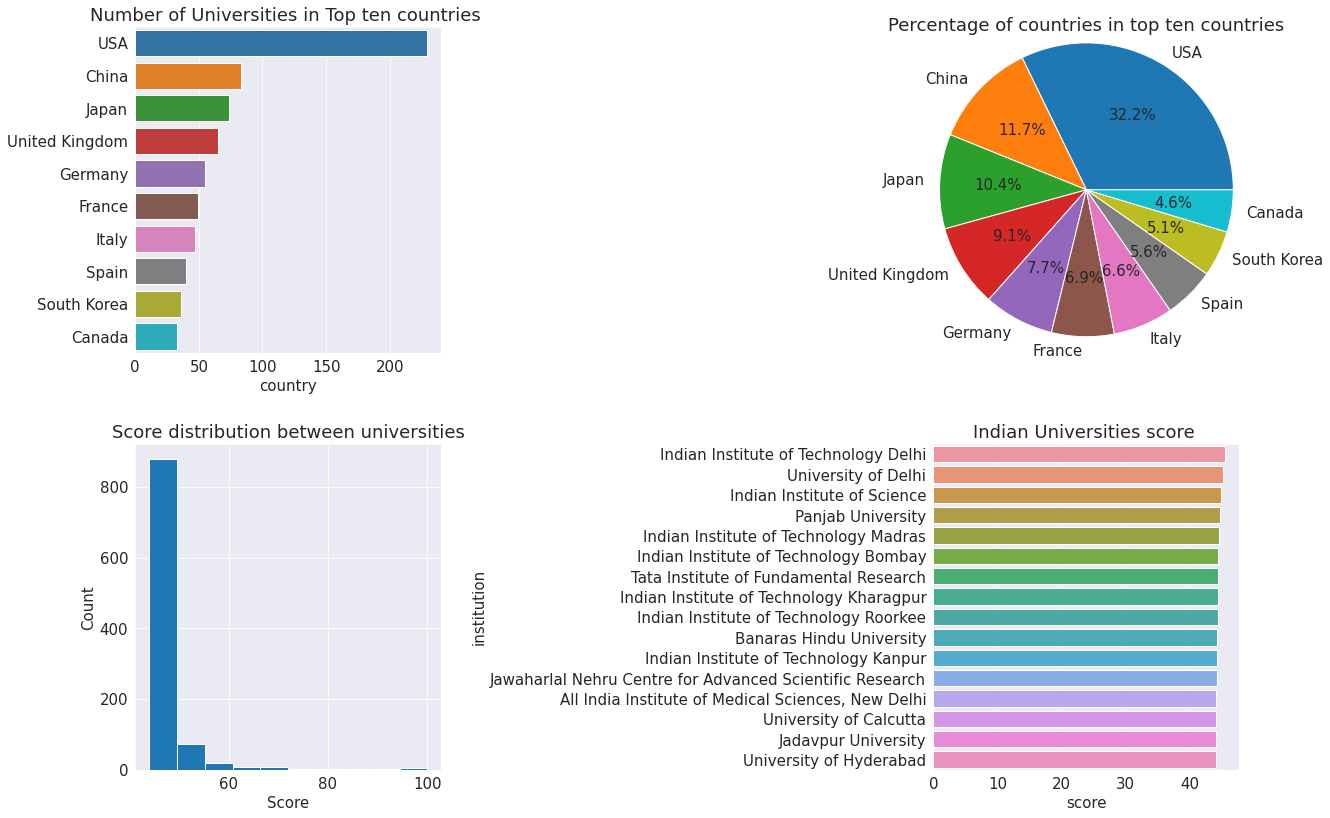

In [39]:
fig, axes = plt.subplots(2, 2, figsize=(18,12))

# Use the axes for plotting

axes[0,0].set_title('Number of Universities in Top ten countries ')
sns.barplot(y=top_countries.index,x=top_countries,ax=axes[0,0]);


# Pass the axes into seaborn
axes[0,1].set_title('Percentage of countries in top ten countries')
axes[0,1].pie(top_countries,labels=top_countries.index,radius=1.2,autopct='%1.1f%%');

# Pass the axes into seaborn
axes[1,0].set_title('Score distribution between universities')
axes[1,0].set_xlabel('Score')
axes[1,0].set_ylabel('Count')
axes[1,0].hist(survey_df.score);
# Pass the axes into seaborn
axes[1,1].set_title('Indian Universities score ')
sns.barplot(y=survey_india_df.institution,x=survey_india_df.score);

plt.tight_layout(pad=2);

## Asking and Answering Questions


We've already gained several insights about universities ranking by exploring individual columns of the dataset. Let's ask some specific questions and try to answer them using data frame operations and visualizations.


#### Q1: Which  Indian university have most number of patent and alumini employment and what is top rank of Indian University

In [40]:
top_indian_university=survey_india_df[survey_india_df.national_rank==1][['institution','world_rank']]
top_indian_university

,institution,world_rank
340,Indian Institute of Technology Delhi,341


Its mean `Indian Institute of Technology Delhi` is number one university of India with world rank `341`

In [41]:
top_rank_on_the_base_of_patent=survey_india_df.sort_values('patents',ascending=True)[['patents','institution']]
print(top_rank_on_the_base_of_patent.iloc[0]['patents'],top_rank_on_the_base_of_patent.iloc[0]['institution'])

176 Indian Institute of Technology Bombay


Its mean `Indian Institute of Technology Bombay` has rank `176` on the basis of patents, maximum among indian univeresities

In [42]:
top_rank_on_the_base_of_patent=survey_india_df.sort_values('alumni_employment',ascending=True)[['alumni_employment','institution']]
print(top_rank_on_the_base_of_patent.iloc[0]['alumni_employment'],top_rank_on_the_base_of_patent.iloc[0]['institution'])

59 Indian Institute of Technology Delhi


Its mean `Indian Institute of Technology Delhi` has rank `56` on the basis of alumini_employment, maximum among indian univeresities, and it is good rank also

#### Q2: How many USA Universities are there in list

In [43]:
print(top_countries.values[0],
top_countries.index[0])

229 USA


Its mean there are `229` universities of `USA` in the survey and here is list of American Universities

In [44]:
list(survey_df[survey_df.country=='USA']['institution'])

['Harvard University',
 'Stanford University',
 'Massachusetts Institute of Technology',
 'Columbia University',
 'University of California, Berkeley',
 'University of Chicago',
 'Princeton University',
 'Cornell University',
 'Yale University',
 'California Institute of Technology',
 'University of Pennsylvania',
 'University of California, Los Angeles',
 'Johns Hopkins University',
 'New York University',
 'University of Michigan, Ann Arbor',
 'University of California, San Diego',
 'Northwestern University',
 'University of Wisconsin–Madison',
 'University of California, San Francisco',
 'Duke University',
 'Rockefeller University',
 'University of Texas at Austin',
 'University of Washington - Seattle',
 'University of Illinois at Urbana–Champaign',
 'University of North Carolina at Chapel Hill',
 'University of Virginia',
 'Purdue University, West Lafayette',
 'Dartmouth College',
 'University of Pittsburgh - Pittsburgh Campus',
 'Pennsylvania State University, University Park',
 

#### Q3: Which is world's number 1 university

In [45]:
world_top=survey_df[survey_df.world_rank==1]
world_top

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,3,100.0,2015


So Harvard University is world's number one university as expected. It is number one in every field except one field which is patents.Harvard University score is 100 out of 100 that's amazing.

#### Q4: Which unversities is number 1 on the basic of quality_of_education

In [46]:
survey_df[survey_df.quality_of_education==1][['institution','country']]

,institution,country
0,Harvard University,USA


It is also Harvard University which is world's best university

#### Q5: Which are top 10 universities that have most influence

In [47]:
most_influence=survey_df.sort_values('influence').copy().head(10)
most_influence=most_influence[['world_rank','institution','country','influence','score']]
most_influence

,world_rank,institution,country,influence,score
0,1,Harvard University,USA,1,100.00
2,3,Massachusetts Institute of Technology,USA,2,97.54
1,2,Stanford University,USA,3,98.66
6,7,"University of California, Berkeley",USA,4,92.25
20,21,"University of California, San Diego",USA,5,66.59
3,4,University of Cambridge,United Kingdom,6,96.81
25,26,"University of California, San Francisco",USA,7,63.69
10,11,Yale University,USA,8,86.61
11,12,California Institute of Technology,USA,9,84.40
30,31,University of Washington - Seattle,USA,10,60.61


these are top ten universities which are most influenceable in the world. As expect `9 out of 10 are from USA` . I think this is reason why america is so influenceable, powerfull and rich.

## Inferences and Conclusion

*We worked on a dataset that belong to a survey of worlds universities.In this survey on the basis of lot of parameters rank of universities is decided  
The main objective of this project is to use the dataset to extract some informations about the universities.*
********************************
We've drawn many inferences from the survey. Here's a summary of a few of them:
- Harvard University is worlds top university.
- Harvard University score is 100 out of 100 that's amazing.
- There are 59 countries which participated in this survey.

- It appears that highest number of universities are from the USA, number is 229 amongs 1000 universities from all across 59 countries of the world. On number 2 there is China with 83 and then Japan on number 3 with 74. Disappointmentily India is not in top 10

- minimum score is 44.02, maximum score is 100.0 and average is 46.86385 of universities

- Score distribution graph is showing that most of countries score lie between 44 to 50, only few universities have score above 70, number of such universities is too small.

 - Only Top 16 universities have score greater than equal to 70


- Only 16 universities are from India


 - Indian Universities score is between  40 and 50. So Indian need to improove their universities 


 - So on the bases of patents MIT is number in the world. Overall rank 1 Harvard University rank is 3 on the basis of patents. 

 - Indian Institute of Technology Delhi is number one university of India with world rank 341

 - Its mean Indian Institute of Technology Bombay has rank 176 on the basis of patents, maximum among indian univeresities





## References and Future Work

This is list of some refrences 

- World University Rankings: https://www.kaggle.com/mylesoneill/world-university-rankings
- Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
- Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
- Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html
- `opendatasets` Python library: https://github.com/JovianML/opendatasets



